In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset from a CSV file
data = pd.read_csv('WUSTL EHMS 2020_Cleaned.csv')  # Make sure to provide the correct file path
data.head(5)

,Label,Dir,Flgs,SrcAddr,DstAddr,Dport,Rate,SrcBytes,DstBytes,SrcLoad,...,DstMac,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST
0,0,0,4,0,0,0,0.035620,0.093561,0.08661,0.244192,...,0,0.000000,0.946429,0.00,0.00000,0.0,0.0,0.00000,0.0000,0.230769
1,0,0,4,0,0,0,0.029693,0.093561,0.08661,0.203690,...,0,0.000061,0.946429,0.00,0.00000,0.0,0.0,0.65546,0.2329,0.538462
2,0,0,4,0,0,0,0.028078,0.093561,0.08661,0.192654,...,0,0.000123,0.946429,0.89,0.53608,0.0,0.0,0.65546,0.2329,0.538462
3,0,0,4,0,0,0,0.026131,0.093561,0.08661,0.179344,...,0,0.000184,0.946429,0.89,0.53608,0.0,0.0,0.66387,0.2329,0.538462
4,0,0,4,0,0,0,0.030305,0.093561,0.08661,0.207869,...,0,0.000245,0.946429,0.89,0.52062,0.0,0.0,0.66387,0.2329,0.538462


In [16]:

# Define the label column and features
X = data.drop('Label', axis=1)  # Replace 'label' with the actual name of your label column
y = data['Label']  # This is your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of data is used for testing

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical


# Encode the target variable if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(y_train_lstm.shape[1], activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

_, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print("LSTM Accuracy:", accuracy_lstm)

# DNN
model_dnn = Sequential()
model_dnn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(y_train_lstm.shape[1], activation='sigmoid'))
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_dnn.fit(X_train, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test, y_test_lstm))

_, accuracy_dnn = model_dnn.evaluate(X_test, y_test_lstm)
print("DNN Accuracy:", accuracy_dnn)

KNN Accuracy: 0.9990808823529411
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2848
           1       1.00      1.00      1.00       416

    accuracy                           1.00      3264
   macro avg       1.00      1.00      1.00      3264
weighted avg       1.00      1.00      1.00      3264

SVM Accuracy: 0.9990808823529411
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2848
           1       1.00      0.99      1.00       416

    accuracy                           1.00      3264
   macro avg       1.00      1.00      1.00      3264
weighted avg       1.00      1.00      1.00      3264

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2848
           1       1.00      1.00      1.00       416

Epoch 1/10
327/327 [==============================] - 8s 17ms/step - loss: 0.3482 - accuracy: 0.8883 - val_loss: 0.2367 - val_accuracy: 0.9697
Epoch 2/10
327/327 [==============================] - 5s 16ms/step - loss: 0.0717 - accuracy: 0.9795 - val_loss: 0.0114 - val_accuracy: 0.9977
Epoch 3/10
327/327 [==============================] - 6s 17ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0110 - val_accuracy: 0.9973
Epoch 4/10
327/327 [==============================] - 6s 17ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0070 - val_accuracy: 0.9977
Epoch 5/10
327/327 [==============================] - 6s 17ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9981
Epoch 6/10
327/327 [==============================] - 6s 18ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0054 - val_accuracy: 0.9977
Epoch 7/10
327/327 [==============================] - 5s 17ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0106 - val_accuracy: 0.9973

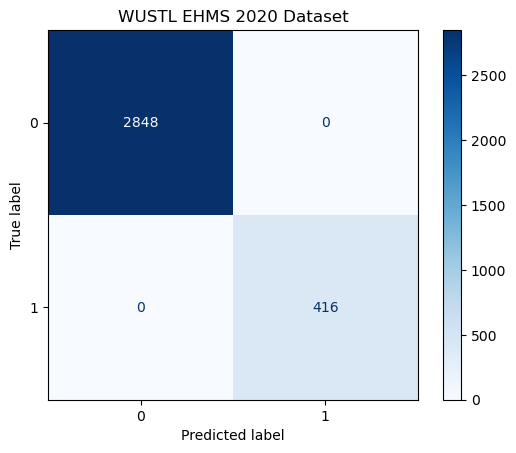

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming y_train and y_test are loaded and available

X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the arrays to add a time step dimension
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

num_classes = 2  # Adjust this as per your dataset specifics

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Extract features
features_train = model.predict(X_train_reshaped)
features_test = model.predict(X_test_reshaped)

# PCA for dimensionality reduction on LSTM-extracted features to retain 95% of the variance
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

# Scaling features
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train_pca)
features_test_scaled = scaler.transform(features_test_pca)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train_scaled, y_train)
predictions = knn.predict(features_test_scaled)
accuracy = accuracy_score(y_test, predictions)

# Print classification report for the automatically determined PCA components
print(f"Classification Report for PCA Components Explaining 95% Variance")
print(classification_report(y_test, predictions))
print(f"Test Accuracy: {accuracy:.4f}")

# Check if current model is better
best_accuracy = accuracy  # update best_accuracy
best_model = knn
best_predictions = predictions
best_features_pca = features_test_scaled
best_probabilities = best_model.predict_proba(best_features_pca)[:, 1]

# Print the best accuracy achieved
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Calculate and plot confusion matrix for the best model
cm = confusion_matrix(y_test, best_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('WUSTL EHMS 2020 Dataset')
plt.show()

In [2]:
# Load the dataset from a CSV file
data = pd.read_csv('ICU_Cleaned.csv')  # Make sure to provide the correct file path
data.head(5)

,class,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,...,mqtt.kalive,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl
0,1,0.000000e+00,0.000000e+00,0.011682,0.000235,0.000235,0.863764,0.000000,0,0.000000e+00,...,0.0,0.0,0.0,0,0,0.0,0,0,0,0
1,1,1.170000e-06,7.870000e-09,0.011682,0.000235,0.000235,0.000000,0.863764,1,8.660000e-07,...,0.0,0.0,0.0,0,0,0.0,0,0,0,0
2,1,1.800000e-07,9.080000e-09,0.011682,0.000235,0.000235,0.863795,0.000000,0,0.000000e+00,...,0.0,0.0,0.0,0,0,0.0,0,0,0,0
3,1,2.700000e-07,1.090000e-08,0.011682,0.000235,0.000235,0.000000,0.863795,1,2.000000e-07,...,0.0,0.0,0.0,0,0,0.0,0,0,0,0
4,1,6.750000e-08,1.130000e-08,0.011682,0.000235,0.000235,0.863827,0.000000,0,0.000000e+00,...,0.0,0.0,0.0,0,0,0.0,0,0,0,0


In [3]:

# Define the label column and features
X = data.drop('class', axis=1)  # Replace 'label' with the actual name of your label column
y = data['class']  # This is your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of data is used for testing


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already loaded

# Convert data to numpy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the arrays to add a time step dimension
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

num_classes = len(np.unique(y_train))  # Determine the number of classes from y_train

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Train the LSTM model
model.fit(X_train_reshaped, y_train_one_hot, epochs=2, batch_size=32, validation_split=0.2)

# Extract features from the trained model
features_train = model.predict(X_train_reshaped)
features_test = model.predict(X_test_reshaped)

# PCA for dimensionality reduction to retain 95% of the variance
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

# Print the explained variance and the names of the features selected by PCA
explained_variance = pca.explained_variance_ratio_
selected_features = np.array([X_train.columns[np.argmax(component)] for component in pca.components_])
print("Explained Variance Ratios:")
print(explained_variance)
print("Selected Features by PCA:")
print(selected_features)

# Scaling features
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train_pca)
features_test_scaled = scaler.transform(features_test_pca)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train_scaled, y_train)
predictions = knn.predict(features_test_scaled)
accuracy = accuracy_score(y_test, predictions)

# Print classification report and accuracy
print(f"Classification Report for PCA Components Explaining 95% Variance")
print(classification_report(y_test, predictions))
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('ICU Dataset')
plt.show()


Epoch 1/2
3774/3774 [==============================] - 71s 18ms/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.2572 - val_accuracy: 0.8632
Epoch 2/2
3097/3774 [=======================>......] - ETA: 12s - loss: 0.2281 - accuracy: 0.8720

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical


# Encode the target variable if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(y_train_lstm.shape[1], activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

_, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print("LSTM Accuracy:", accuracy_lstm)

# DNN
model_dnn = Sequential()
model_dnn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(y_train_lstm.shape[1], activation='softmax'))
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_dnn.fit(X_train, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test, y_test_lstm))

_, accuracy_dnn = model_dnn.evaluate(X_test, y_test_lstm)
print("DNN Accuracy:", accuracy_dnn)

KNN Accuracy: 0.9923686372187922
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15456
           1       1.00      1.00      1.00     16027
           2       0.98      0.98      0.98      6256

    accuracy                           0.99     37739
   macro avg       0.99      0.99      0.99     37739
weighted avg       0.99      0.99      0.99     37739

SVM Accuracy: 0.9889239248522749
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     15456
           1       1.00      1.00      1.00     16027
           2       1.00      0.93      0.97      6256

    accuracy                           0.99     37739
   macro avg       0.99      0.98      0.98     37739
weighted avg       0.99      0.99      0.99     37739

Naive Bayes Accuracy: 0.9122128302286759
Naive Bayes Classification Report:
               precision    recall  f1-s

Epoch 1/20
3774/3774 [==============================] - 68s 17ms/step - loss: 0.3015 - accuracy: 0.8408 - val_loss: 0.2175 - val_accuracy: 0.8539
Epoch 2/20
3774/3774 [==============================] - 68s 18ms/step - loss: 0.2102 - accuracy: 0.8749 - val_loss: 0.2137 - val_accuracy: 0.8761
Epoch 3/20
3774/3774 [==============================] - 77s 20ms/step - loss: 0.1464 - accuracy: 0.9256 - val_loss: 0.1653 - val_accuracy: 0.9183
Epoch 4/20
3774/3774 [==============================] - 80s 21ms/step - loss: 0.0895 - accuracy: 0.9610 - val_loss: 0.0545 - val_accuracy: 0.9832
Epoch 5/20
3774/3774 [==============================] - 78s 21ms/step - loss: 0.0524 - accuracy: 0.9787 - val_loss: 0.0407 - val_accuracy: 0.9843
Epoch 6/20
3774/3774 [==============================] - 80s 21ms/step - loss: 0.0312 - accuracy: 0.9864 - val_loss: 0.0181 - val_accuracy: 0.9901
Epoch 7/20
3774/3774 [==============================] - 77s 20ms/step - loss: 0.0266 - accuracy: 0.9876 - val_loss: 0.0193 -

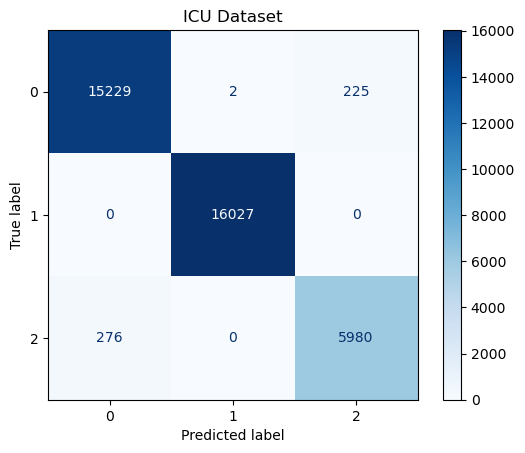

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming y_train and y_test are loaded and available

X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the arrays to add a time step dimension
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

num_classes = 3  # Adjust this as per your dataset specifics

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.2)

# Extract features
features_train = model.predict(X_train_reshaped)
features_test = model.predict(X_test_reshaped)

# PCA for dimensionality reduction on LSTM-extracted features to retain 95% of the variance
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

# Scaling features
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train_pca)
features_test_scaled = scaler.transform(features_test_pca)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train_scaled, y_train)
predictions = knn.predict(features_test_scaled)
accuracy = accuracy_score(y_test, predictions)

# Print classification report for the automatically determined PCA components
print(f"Classification Report for PCA Components Explaining 95% Variance")
print(classification_report(y_test, predictions))
print(f"Test Accuracy: {accuracy:.4f}")

# Check if current model is better
best_accuracy = accuracy  # update best_accuracy
best_model = knn
best_predictions = predictions
best_features_pca = features_test_scaled
best_probabilities = best_model.predict_proba(best_features_pca)[:, 1]

# Print the best accuracy achieved
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Calculate and plot confusion matrix for the best model
cm = confusion_matrix(y_test, best_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('ICU Dataset')
plt.show()


In [2]:
# Load the dataset from a CSV file
data = pd.read_csv('ECU_IoHT_M.csv')  # Make sure to provide the correct file path
data.head(5)

,Type of attack,No.,Time,Source,Destination,Protocol,Length
0,4,0.000000,0.000000e+00,67,69,0,0.000000
1,4,0.000009,2.924010e-07,1,68,0,0.000000
2,4,0.000018,1.985530e-05,67,69,0,0.000000
3,0,0.000027,2.005200e-05,58,58,2,0.030028
4,4,0.000036,4.071120e-05,1,68,0,0.000000


In [3]:
# Check for NaN values
print(data.isna().sum())
# Fill NaN values with the mean of each column
data_filled = data.fillna(data.mean())


Type of attack    0
No.               0
Time              0
Source            0
Destination       0
Protocol          0
Length            0
dtype: int64


In [4]:
data_filled.head(5)

,Type of attack,No.,Time,Source,Destination,Protocol,Length
0,4,0.000000,0.000000e+00,67,69,0,0.000000
1,4,0.000009,2.924010e-07,1,68,0,0.000000
2,4,0.000018,1.985530e-05,67,69,0,0.000000
3,0,0.000027,2.005200e-05,58,58,2,0.030028
4,4,0.000036,4.071120e-05,1,68,0,0.000000


Class distribution before oversampling:
1    62320
0    18783
2     5441
4     1915
3      506
Name: count, dtype: int64

Class distribution after oversampling:
0    62320
1    62320
2    62320
3    62320
4    62320
Name: count, dtype: int64


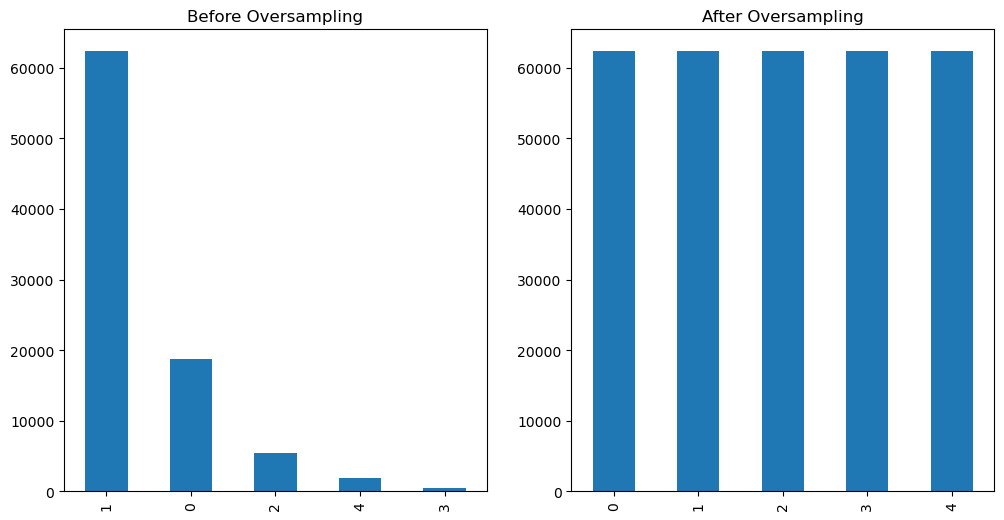

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the label column and features
XX = data_filled.drop('Type of attack', axis=1)  # Replace 'Type of attack' with the actual name of your label column
yy = data_filled['Type of attack']  # This is your target variable

# Encode the target variable if necessary
label_encoder = LabelEncoder()
yy = label_encoder.fit_transform(yy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

# Convert y_train to a pandas Series to use value_counts
y_train_series = pd.Series(y_train)

# Print class distribution before oversampling
print("Class distribution before oversampling:")
print(y_train_series.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert y_train_resampled to a pandas Series to use value_counts
y_train_resampled_series = pd.Series(y_train_resampled)

# Print class distribution after oversampling
print("\nClass distribution after oversampling:")
print(y_train_resampled_series.value_counts())

# Plot class distribution before and after oversampling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_train_series.value_counts().plot(kind='bar', ax=axes[0], title='Before Oversampling')
y_train_resampled_series.value_counts().plot(kind='bar', ax=axes[1], title='After Oversampling')

plt.show()

Class distribution before oversampling:
1    62320
0    18783
2     5441
4     1915
3      506
Name: count, dtype: int64

Class distribution after oversampling:
0    62320
1    62320
2    62320
3    62320
4    62320
Name: count, dtype: int64


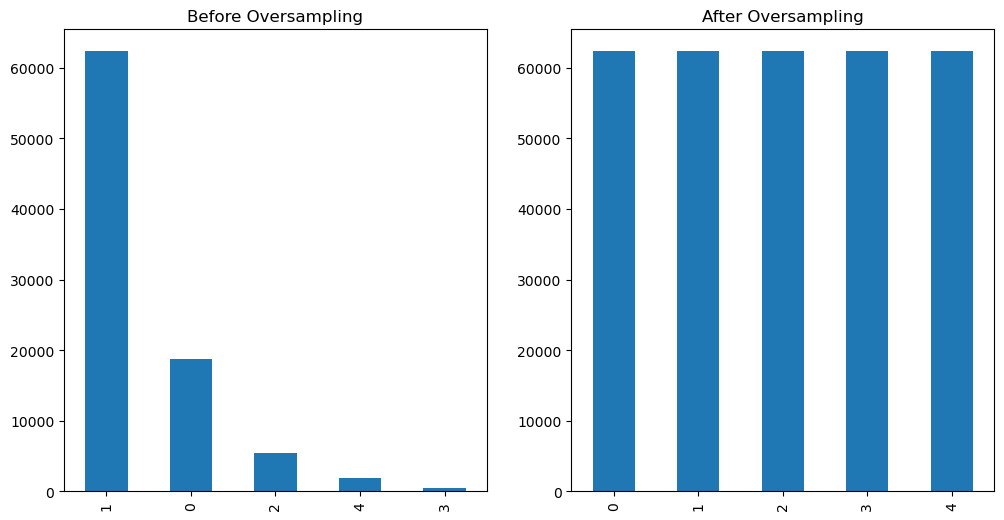

Epoch 1/15
4869/4869 - 17s - loss: 0.0959 - accuracy: 0.9686 - val_loss: 7.7404 - val_accuracy: 0.0259 - 17s/epoch - 4ms/step
Epoch 2/15
4869/4869 - 14s - loss: 0.0769 - accuracy: 0.9729 - val_loss: 2.3726 - val_accuracy: 0.6164 - 14s/epoch - 3ms/step
Epoch 3/15
4869/4869 - 13s - loss: 0.0699 - accuracy: 0.9733 - val_loss: 2.1368 - val_accuracy: 0.7215 - 13s/epoch - 3ms/step
Epoch 4/15
4869/4869 - 13s - loss: 0.0665 - accuracy: 0.9738 - val_loss: 2.4125 - val_accuracy: 0.6826 - 13s/epoch - 3ms/step
Epoch 5/15
4869/4869 - 14s - loss: 0.0700 - accuracy: 0.9732 - val_loss: 1.8806 - val_accuracy: 0.7273 - 14s/epoch - 3ms/step
Epoch 6/15
4869/4869 - 13s - loss: 0.0647 - accuracy: 0.9739 - val_loss: 2.0958 - val_accuracy: 0.7276 - 13s/epoch - 3ms/step
Epoch 7/15
4869/4869 - 14s - loss: 0.0666 - accuracy: 0.9741 - val_loss: 1.9740 - val_accuracy: 0.7377 - 14s/epoch - 3ms/step
Epoch 8/15
4869/4869 - 13s - loss: 0.0647 - accuracy: 0.9746 - val_loss: 2.0111 - val_accuracy: 0.7315 - 13s/epoch - 3

TypeError: object of type 'numpy.int64' has no len()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the label column and features
XX = data_filled.drop('Type of attack', axis=1)  # Replace 'Type of attack' with the actual name of your label column
yy = data_filled['Type of attack']  # This is your target variable

# Encode the target variable if necessary
label_encoder = LabelEncoder()
yy = label_encoder.fit_transform(yy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

# Convert y_train to a pandas Series to use value_counts
y_train_series = pd.Series(y_train)

# Print class distribution before oversampling
print("Class distribution before oversampling:")
print(y_train_series.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert y_train_resampled to a pandas Series to use value_counts
y_train_resampled_series = pd.Series(y_train_resampled)

# Print class distribution after oversampling
print("\nClass distribution after oversampling:")
print(y_train_resampled_series.value_counts())

# Plot class distribution before and after oversampling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_train_series.value_counts().plot(kind='bar', ax=axes[0], title='Before Oversampling')
y_train_resampled_series.value_counts().plot(kind='bar', ax=axes[1], title='After Oversampling')

plt.show()

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert labels to categorical
y_train_resampled = to_categorical(y_train_resampled)
y_test_cat = to_categorical(y_test)

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(y_train_resampled.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=15, batch_size=64, validation_data=(X_test, y_test_cat), verbose=2, shuffle=False)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test_cat)
print(f'Accuracy: {accuracy*100:.2f}%')

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Class distribution before oversampling:
1    62320
0    18783
2     5441
4     1915
3      506
Name: count, dtype: int64

Class distribution after oversampling:
0    62320
1    62320
2    62320
3    62320
4    62320
Name: count, dtype: int64


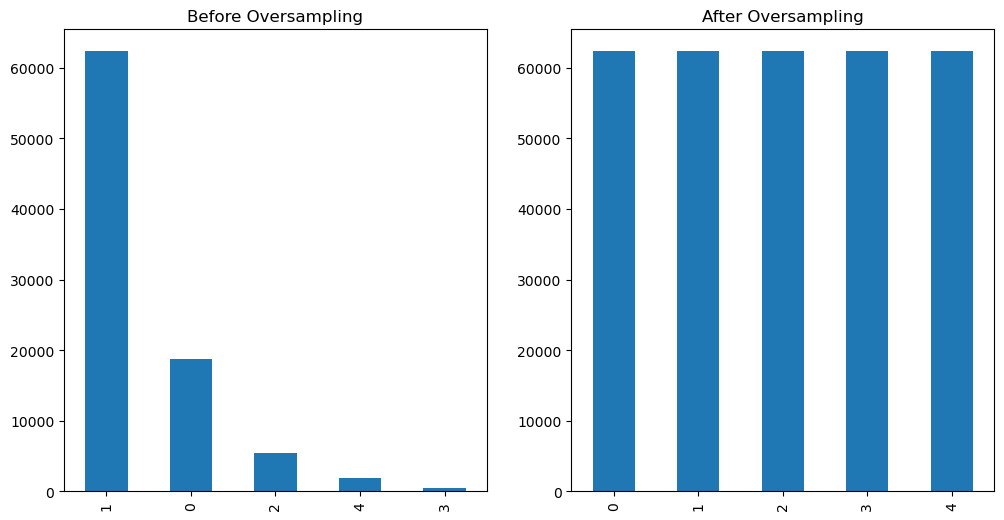

KNN Accuracy: 0.9857027245751281
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      4670
           1       1.00      1.00      1.00     15600
           2       0.95      0.94      0.94      1395
           3       0.44      0.92      0.60       133
           4       1.00      1.00      1.00       444

    accuracy                           0.99     22242
   macro avg       0.87      0.96      0.90     22242
weighted avg       0.99      0.99      0.99     22242

SVM Accuracy: 0.9536462548331984
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      4670
           1       1.00      1.00      1.00     15600
           2       0.67      0.92      0.77      1395
           3       0.30      0.98      0.46       133
           4       1.00      1.00      1.00       444

    accuracy                           0.95     22242
   macro 

ValueError: Negative values in data passed to MultinomialNB (input X)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the label column and features
XX = data_filled.drop('Type of attack', axis=1)  # Replace 'Type of attack' with the actual name of your label column
yy = data_filled['Type of attack']  # This is your target variable

# Encode the target variable if necessary
label_encoder = LabelEncoder()
yy = label_encoder.fit_transform(yy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

# Convert y_train to a pandas Series to use value_counts
y_train_series = pd.Series(y_train)

# Print class distribution before oversampling
print("Class distribution before oversampling:")
print(y_train_series.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert y_train_resampled to a pandas Series to use value_counts
y_train_resampled_series = pd.Series(y_train_resampled)

# Print class distribution after oversampling
print("\nClass distribution after oversampling:")
print(y_train_resampled_series.value_counts())

# Plot class distribution before and after oversampling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_train_series.value_counts().plot(kind='bar', ax=axes[0], title='Before Oversampling')
y_train_resampled_series.value_counts().plot(kind='bar', ax=axes[1], title='After Oversampling')

plt.show()

# Standardize the feature columns
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# SVM
svm = SVC()
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)
y_pred_gnb = gnb.predict(X_test)
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_gnb))

# # Polynomial Features for Multinomial Naive Bayes
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# X_train_poly = poly.fit_transform(X_train_resampled)
# X_test_poly = poly.transform(X_test)

# # Multinomial Naive Bayes
# mnb = MultinomialNB()
# mnb.fit(X_train_poly, y_train_resampled)
# y_pred_mnb = mnb.predict(X_test_poly)
# print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_mnb))
# print("Multinomial Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_mnb))

# DNN
model_dnn = Sequential()
model_dnn.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(len(np.unique(y_train_resampled)), activation='softmax'))
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encode the target variable for DNN
y_train_one_hot = to_categorical(y_train_resampled)
y_test_one_hot = to_categorical(y_test)

model_dnn.fit(X_train_resampled, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot))

_, accuracy_dnn = model_dnn.evaluate(X_test, y_test_one_hot)
print("DNN Accuracy:", accuracy_dnn)

# LSTM
X_train_lstm = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(len(np.unique(y_train_resampled)), activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_lstm.fit(X_train_lstm, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_one_hot))

_, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_one_hot)
print("LSTM Accuracy:", accuracy_lstm)


In [39]:

# # DNN
# model_dnn = Sequential()
# model_dnn.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))
# model_dnn.add(Dropout(0.2))
# model_dnn.add(Dense(64, activation='relu'))
# model_dnn.add(Dropout(0.2))
# model_dnn.add(Dense(len(np.unique(y_train_resampled)), activation='softmax'))
# model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # One-hot encode the target variable for DNN
# y_train_one_hot = to_categorical(y_train_resampled)
# y_test_one_hot = to_categorical(y_test)

# model_dnn.fit(X_train_resampled, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot))

# _, accuracy_dnn = model_dnn.evaluate(X_test, y_test_one_hot)
# print("DNN Accuracy:", accuracy_dnn)

# # LSTM
# X_train_lstm = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
# X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# model_lstm = Sequential()
# model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(Dense(len(np.unique(y_train_resampled)), activation='softmax'))
# model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model_lstm.fit(X_train_lstm, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_one_hot))

# _, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_one_hot)
# print("LSTM Accuracy:", accuracy_lstm)


In [38]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
# from sklearn.decomposition import PCA
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.neighbors import KNeighborsClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# import numpy as np

# # Standardize the feature columns
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

# # Convert the resampled data to numpy arrays
# X_train_array = X_train_resampled
# X_test_array = X_test

# num_classes = len(np.unique(y_train_resampled))  # Adjust this as per your dataset specifics

# # Define the DNN model
# model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(X_train_array.shape[1],)))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# # One-hot encode the target variable
# y_train_one_hot = to_categorical(y_train_resampled, num_classes=num_classes)
# y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# # Train the model
# model.fit(X_train_array, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.1)

# # Extract features
# features_train = model.predict(X_train_array)
# features_test = model.predict(X_test_array)

# # PCA for dimensionality reduction on DNN-extracted features to retain 95% of the variance
# pca = PCA(n_components=0.95)
# features_train_pca = pca.fit_transform(features_train)
# features_test_pca = pca.transform(features_test)

# # Scaling features
# scaler = MinMaxScaler()
# features_train_scaled = scaler.fit_transform(features_train_pca)
# features_test_scaled = scaler.transform(features_test_pca)

# # KNN Classifier
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(features_train_scaled, y_train_resampled)
# predictions = knn.predict(features_test_scaled)
# accuracy = accuracy_score(y_test, predictions)

# # Print classification report for the automatically determined PCA components
# print(f"Classification Report for PCA Components Explaining 95% Variance")
# print(classification_report(y_test, predictions))
# print(f"Test Accuracy: {accuracy:.4f}")

# # Check if current model is better
# best_accuracy = accuracy  # update best_accuracy
# best_model = knn
# best_predictions = predictions
# best_features_pca = features_test_scaled
# best_probabilities = best_model.predict_proba(best_features_pca)[:, 1]

# # Print the best accuracy achieved
# print(f"Best Test Accuracy: {best_accuracy:.4f}")

# # Calculate and plot confusion matrix for the best model
# cm = confusion_matrix(y_test, best_predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap='Blues')
# plt.title('ECU_IoHT Dataset')
# plt.show()


Epoch 1/10
3339/3339 [==============================] - 24s 6ms/step - loss: 0.3937 - accuracy: 0.8509 - val_loss: 3.6837e-04 - val_accuracy: 1.0000
Epoch 2/10
3339/3339 [==============================] - 22s 7ms/step - loss: 0.3164 - accuracy: 0.8745 - val_loss: 8.9524e-05 - val_accuracy: 1.0000
Epoch 3/10
3339/3339 [==============================] - 23s 7ms/step - loss: 0.2914 - accuracy: 0.8799 - val_loss: 3.2416e-05 - val_accuracy: 1.0000
Epoch 4/10
3339/3339 [==============================] - 24s 7ms/step - loss: 0.2795 - accuracy: 0.8829 - val_loss: 1.2435e-05 - val_accuracy: 1.0000
Epoch 5/10
3339/3339 [==============================] - 23s 7ms/step - loss: 0.2715 - accuracy: 0.8839 - val_loss: 5.3637e-06 - val_accuracy: 1.0000
Epoch 6/10
3339/3339 [==============================] - 23s 7ms/step - loss: 0.2565 - accuracy: 0.8876 - val_loss: 2.9452e-07 - val_accuracy: 1.0000
Epoch 7/10
3339/3339 [==============================] - 26s 8ms/step - loss: 0.2275 - accuracy: 0.9013 - v

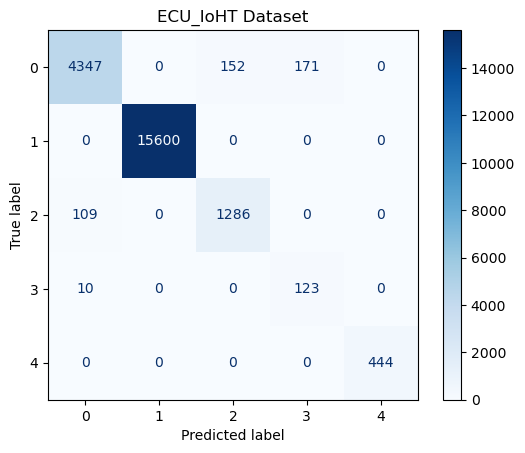

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Nadam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Convert the resampled data to numpy arrays
X_train_array = X_train_resampled.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the arrays to add a time step dimension
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

num_classes = len(y_train_resampled.unique())  # Adjust this as per your dataset specifics

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Train the model
model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=84, validation_split=0.1)

# Extract features
features_train = model.predict(X_train_reshaped)
features_test = model.predict(X_test_reshaped)

# PCA for dimensionality reduction on LSTM-extracted features to retain 95% of the variance
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

# Scaling features
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train_pca)
features_test_scaled = scaler.transform(features_test_pca)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train_scaled, y_train_resampled)
predictions = knn.predict(features_test_scaled)
accuracy = accuracy_score(y_test, predictions)

# Print classification report for the automatically determined PCA components
print(f"Classification Report for PCA Components Explaining 95% Variance")
print(classification_report(y_test, predictions))
print(f"Test Accuracy: {accuracy:.4f}")

# Check if current model is better
best_accuracy = accuracy  # update best_accuracy
best_model = knn
best_predictions = predictions
best_features_pca = features_test_scaled
best_probabilities = best_model.predict_proba(best_features_pca)[:, 1]

# Print the best accuracy achieved
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Calculate and plot confusion matrix for the best model
cm = confusion_matrix(y_test, best_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('ECU_IoHT Dataset')
plt.show()

In [3]:
# Load the dataset from a CSV file
data = pd.read_csv('TON_IoT - Multiclass.csv')  # Make sure to provide the correct file path
data.head(5)

,ts,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,...,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,type,weird_addl,weird_notice
0,0.000000e+00,0.028718,0.808424,1,1,8.613360e-01,0.000453,1.071400e-02,13,0.0,...,0.0,0.0,0.0,1,1,1,5,0,4,2
1,0.000000e+00,0.721148,0.238059,2,1,0.000000e+00,0.000000,0.000000e+00,6,0.0,...,0.0,0.0,0.0,1,1,1,12,0,4,1
2,4.250000e-07,0.028673,0.790203,1,1,0.000000e+00,0.000000,0.000000e+00,13,0.0,...,0.0,0.0,0.0,1,1,1,5,0,4,2
3,4.250000e-07,0.523324,0.160263,1,1,0.000000e+00,0.000000,0.000000e+00,13,0.0,...,0.0,0.0,0.0,1,1,1,12,0,4,1
4,1.700000e-06,0.711199,0.000809,2,4,5.870000e-09,0.000000,7.610000e-08,12,0.0,...,0.0,0.0,0.0,1,1,1,6,0,4,2


In [4]:
# Define the label column and features
X = data.drop('type', axis=1)  # Replace 'label' with the actual name of your label column
y = data['type']  # This is your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of data is used for testing


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical

# Encode the target variable if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(y_train_lstm.shape[1], activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

_, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print("LSTM Accuracy:", accuracy_lstm)

# DNN
model_dnn = Sequential()
model_dnn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(y_train_lstm.shape[1], activation='softmax'))
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_dnn.fit(X_train, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test, y_test_lstm))

_, accuracy_dnn = model_dnn.evaluate(X_test, y_test_lstm)
print("DNN Accuracy:", accuracy_dnn)

KNN Accuracy: 0.9961283605721785
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59973
           1       1.00      1.00      1.00      3948
           2       0.99      0.99      0.99      4015
           3       1.00      0.99      1.00      4035
           4       0.99      0.99      0.99      4031
           5       0.99      0.91      0.95       219
           6       0.99      0.99      0.99      3902
           7       1.00      1.00      1.00      4067
           8       1.00      1.00      1.00      4085
           9       0.98      0.99      0.98      3934

    accuracy                           1.00     92209
   macro avg       0.99      0.99      0.99     92209
weighted avg       1.00      1.00      1.00     92209

Naive Bayes Accuracy: 0.978624646184212
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     5

Epoch 19/20
11527/11527 [==============================] - 15s 1ms/step - loss: 0.0443 - accuracy: 0.9903 - val_loss: 0.0280 - val_accuracy: 0.9938
Epoch 20/20
2882/2882 [==============================] - 2s 772us/step - loss: 0.0227 - accuracy: 0.9936
DNN Accuracy: 0.9936015009880066


Epoch 1/10
10374/10374 [==============================] - 204s 19ms/step - loss: 0.6324 - accuracy: 0.7941 - val_loss: 0.4087 - val_accuracy: 0.8643
Epoch 2/10
10374/10374 [==============================] - 195s 19ms/step - loss: 0.3222 - accuracy: 0.8897 - val_loss: 0.2192 - val_accuracy: 0.9163
Epoch 3/10
10374/10374 [==============================] - 206s 20ms/step - loss: 0.2367 - accuracy: 0.9198 - val_loss: 0.0919 - val_accuracy: 0.9744
Epoch 4/10
10374/10374 [==============================] - 174s 17ms/step - loss: 0.0782 - accuracy: 0.9751 - val_loss: 0.0356 - val_accuracy: 0.9898
Epoch 5/10
10374/10374 [==============================] - 198s 19ms/step - loss: 0.1704 - accuracy: 0.9443 - val_loss: 0.1310 - val_accuracy: 0.9605
Epoch 6/10
10374/10374 [==============================] - 211s 20ms/step - loss: 0.0683 - accuracy: 0.9785 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 7/10
10374/10374 [==============================] - 201s 19ms/step - loss: 0.0463 - accuracy: 0.9847

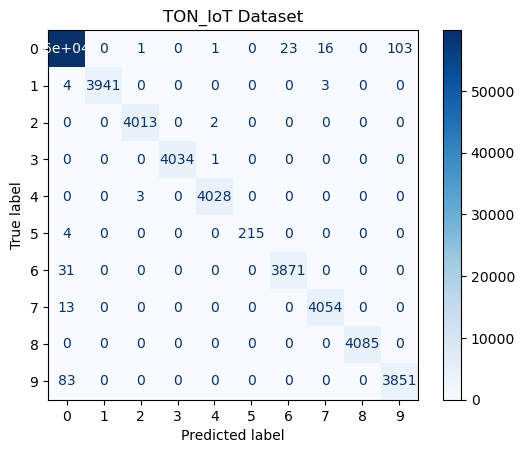

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Nadam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming y_train and y_test are loaded and available

X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the arrays to add a time step dimension
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

num_classes = 10  # Adjust this as per your dataset specifics

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.1)

# Extract features
features_train = model.predict(X_train_reshaped)
features_test = model.predict(X_test_reshaped)

# PCA for dimensionality reduction on LSTM-extracted features to retain 95% of the variance
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

# Scaling features
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train_pca)
features_test_scaled = scaler.transform(features_test_pca)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train_scaled, y_train)
predictions = knn.predict(features_test_scaled)
accuracy = accuracy_score(y_test, predictions)

# Print classification report for the automatically determined PCA components
print(f"Classification Report for PCA Components Explaining 95% Variance")
print(classification_report(y_test, predictions))
print(f"Test Accuracy: {accuracy:.4f}")

# Check if current model is better
best_accuracy = accuracy  # update best_accuracy
best_model = knn
best_predictions = predictions
best_features_pca = features_test_scaled
best_probabilities = best_model.predict_proba(best_features_pca)[:, 1]

# Print the best accuracy achieved
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Calculate and plot confusion matrix for the best model
cm = confusion_matrix(y_test, best_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('TON_IoT Dataset')
plt.show()